# 🚆 Railway Data Engineering & Analytics

## Level 1: Data Exploration and Basic Operations

#### Task 1.1: Load and Inspect Data

In [35]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [36]:
# Load dataset
df=pd.read_csv("Railway_info.csv", encoding= 'unicode_escape')

In [37]:
# Display first 10 rows
df.head(10)

,Train_No,Train_Name,Source_Station_Name,Destination_Station_Name,days
0,107,SWV-MAO-VLNK,SAWANTWADI ROAD,MADGOAN JN.,Saturday
1,108,VLNK-MAO-SWV,MADGOAN JN.,SAWANTWADI ROAD,Friday
2,128,MAO-KOP SPEC,MADGOAN JN.,CHHATRAPATI SHAHU MAHARAJ TERMINUS,Friday
3,290,PALACE ON WH,DELHI-SAFDAR JANG,DELHI-SAFDAR JANG,Wednesday
4,401,BSB BHARATDA,AURANGABAD,VARANASI JN.,Saturday
5,421,LKO-SVDK FTR,LUCKNOW JN.,SHRI MATA VAISHNO DEVI KATRA,Tuesday
6,422,SVDK-LKO FTR,SHRI MATA VAISHNO DEVI KATRA,LUCKNOW JN.,Monday
7,477,FTR TRAIN NO,SIRSA,SIRSA,Sunday
8,502,RJPB-UMB FTR,RAJENDRANAGAR TERMINAL,AMBALA CANTT JN,Monday
9,504,PNBE-BTI FTR,PATNA JN.,BATHINDA JN,Wednesday


In [38]:
print(f"No. of Rows: {df.shape[0]} \nNo. of Columns: {df.shape[1]}")

No. of Rows: 11113 
No. of Columns: 5


In [39]:
# Dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Train_No                  11113 non-null  int64 
 1   Train_Name                11113 non-null  object
 2   Source_Station_Name       11113 non-null  object
 3   Destination_Station_Name  11113 non-null  object
 4   days                      11113 non-null  object
dtypes: int64(1), object(4)
memory usage: 434.2+ KB


In [40]:
# Check missing values
pd.isnull(df).sum()

Train_No                    0
Train_Name                  0
Source_Station_Name         0
Destination_Station_Name    0
days                        0
dtype: int64

In [41]:
# Unique values from the 'days' column
df['days'].unique()

array(['Saturday', 'Friday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday',
       'Thursday', 'Mondayd', 'Thursdayd', 'Tuesdayd', 'Fridayd',
       'Wednesdayd', 'Saturdayd', 'Sundayd'], dtype=object)

#### Task 1.2: Basic Statistics

In [42]:
# Total number of trains
total_trains = df['Train_No'].nunique()

print(f"Total number of trains : {total_trains}")

Total number of trains : 11113


In [43]:
# Unique source stations
unique_sources = df['Source_Station_Name'].nunique()

print(f"Unique source stations : {unique_sources}")

Unique source stations : 921


In [44]:
# Unique destination stations
unique_destinations = df['Destination_Station_Name'].nunique()

print(f"Unique destination stations : {unique_destinations}")

Unique destination stations : 924


In [45]:
# Most common source station
most_common_source = df['Source_Station_Name'].value_counts().idxmax()

most_common_source
print(f"Most common source station : {most_common_source}")

Most common source station : CST-MUMBAI


In [46]:
# Most common destination station
most_common_destination = df['Destination_Station_Name'].value_counts().idxmax()

print(f"Most common destination station : {most_common_destination}")

Most common destination station : CST-MUMBAI


**Insides :**

The network is a **highly centralized system** focused on **Mumbai**. Despite covering over 900 locations, the data shows that **CST-Mumbai** acts as the primary **"anchor"** or **heart** of the operation, serving as the top hub for both starting and ending journeys across **11,113 train** routes.

#### Task 1.3: Data Cleaning

In [47]:
# Check missing values
df.isnull().sum()

Train_No                    0
Train_Name                  0
Source_Station_Name         0
Destination_Station_Name    0
days                        0
dtype: int64

In [48]:
# Standardize station names to uppercase
df['Source_Station_Name'] = df['Source_Station_Name'].str.upper().str.strip()
df['Destination_Station_Name'] = df['Destination_Station_Name'].str.upper().str.strip()
df['Train_Name'] = df['Train_Name'].str.upper().str.strip()
df['days'] = df['days'].str.capitalize()

In [49]:
# Remove 'd' from the end of strings in the 'days' column
df['days'] = df['days'].str.rstrip('d')

print(df['days'].unique())

['Saturday' 'Friday' 'Wednesday' 'Tuesday' 'Monday' 'Sunday' 'Thursday']


## Level 2: Data Transformation and Aggregation

#### Task 2.1: Data Filtering

In [50]:
# Trains operating on Saturday
saturday_trains = df[df['days'] == 'Saturday']
saturday_trains.head()

,Train_No,Train_Name,Source_Station_Name,Destination_Station_Name,days
0,107,SWV-MAO-VLNK,SAWANTWADI ROAD,MADGOAN JN.,Saturday
4,401,BSB BHARATDA,AURANGABAD,VARANASI JN.,Saturday
21,1196,NGP-KRMI SPL,NAGPUR JN.(CR),KARMALI,Saturday
28,1706,JBP-BDTS SF,JABALPUR,BANDRA TERMINUS,Saturday
45,2834,SRC-RJT SF A,SANTRAGACHI JN.,RAJKOT,Saturday


In [51]:
# Trains starting from a specific station
source_station = "PATNA JN."
patna_trains = df[df['Source_Station_Name'] == source_station]
patna_trains

,Train_No,Train_Name,Source_Station_Name,Destination_Station_Name,days
9,504,PNBE-BTI FTR,PATNA JN.,BATHINDA JN,Wednesday
10,506,PNBE-PTA FTR,PATNA JN.,PATIALA,Friday
13,604,PNBE-ASR FTR,PATNA JN.,AMRITSAR JN.,Thursday
455,12024,PATNA HOWRAH,PATNA JN.,HOWRAH JN.,Wednesday
765,12360,KOL GARIB RA,PATNA JN.,KOLKATA,Friday
...,...,...,...,...,...
7829,63284,PNBE-BJU MEM,PATNA JN.,BARAUNI JN.,Wednesday
8593,73212,PNBE-PTG DE,PATNA JN.,PATNA GHAT,Friday
8599,73262,PNBE-IPR DEM,PATNA JN.,ISLAMPUR,Friday
8601,73264,PNBE-IPR DEM,PATNA JN.,ISLAMPUR,Thursday


#### Task 2.2: Grouping and Aggregation

In [52]:
# Count trains per source station
trains_per_source = df.groupby('Source_Station_Name')['Train_No'].count().reset_index()
trains_per_source.rename(columns={'Train_No': 'Train_Count'}, inplace=True)
trains_per_source.sort_values(by='Train_Count', ascending=False).head(10)

,Source_Station_Name,Train_Count
224,CST-MUMBAI,513
773,SEALDAH,372
201,CHENNAI BEACH,339
373,HOWRAH JN.,338
426,KALYAN JN,285
843,THANE,186
660,PANVEL,141
832,TAMBARAM,140
585,MOOR MARKET,135
894,VELACHEERY,115


**Insides :**

**Mumbai** and **Kolkata dominate the network's traffic**. CST-Mumbai and Sealdah are the busiest departure hubs, starting significantly more trains than any other stations. Additionally, the presence of multiple Mumbai-area stations (Kalyan, Thane, Panvel) in the top 10 highlights the region's massive role in railway operations.

In [53]:
# Average trains per day for each source station
avg_trains_per_day = df.groupby(['Source_Station_Name', 'days']).size().groupby('Source_Station_Name').mean().round(2)
avg_trains_per_day.sort_values(ascending=False).head(10)

Source_Station_Name
CST-MUMBAI       73.29
SEALDAH          53.14
CHENNAI BEACH    48.43
HOWRAH JN.       48.29
KALYAN JN        40.71
THANE            26.57
PANVEL           20.14
TAMBARAM         20.00
MOOR MARKET      19.29
VELACHEERY       16.43
dtype: float64

**Insides :**

**Massive Daily Volume:** **CST-MUMBAI** isn't just a busy station; it averages a staggering **73 trains per day**, followed closely by **SEALDAH** with **53**.

**Commuter Hub Dominance:** Most of the top stations (like Chennai Beach, Kalyan, and Tambaram) are key parts of suburban rail networks. Their high daily averages indicate they serve as critical daily transport arteries for major metros like Mumbai and Chennai.

**Operational Consistency:** The high averages across these top 10 stations suggest that the vast majority of their 11,000+ total trains are daily services, rather than weekly or occasional routes.

#### Task 2.3: Data Enrichment

In [54]:
# Categorize days
def categorize_day(day):
    if day in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'

df['Day_Type'] = df['days'].apply(categorize_day)
df.head()

,Train_No,Train_Name,Source_Station_Name,Destination_Station_Name,days,Day_Type
0,107,SWV-MAO-VLNK,SAWANTWADI ROAD,MADGOAN JN.,Saturday,Weekend
1,108,VLNK-MAO-SWV,MADGOAN JN.,SAWANTWADI ROAD,Friday,Weekday
2,128,MAO-KOP SPEC,MADGOAN JN.,CHHATRAPATI SHAHU MAHARAJ TERMINUS,Friday,Weekday
3,290,PALACE ON WH,DELHI-SAFDAR JANG,DELHI-SAFDAR JANG,Wednesday,Weekday
4,401,BSB BHARATDA,AURANGABAD,VARANASI JN.,Saturday,Weekend


## Level 3: Advanced Data Analysis

#### Task 3.1: Pattern Analysis

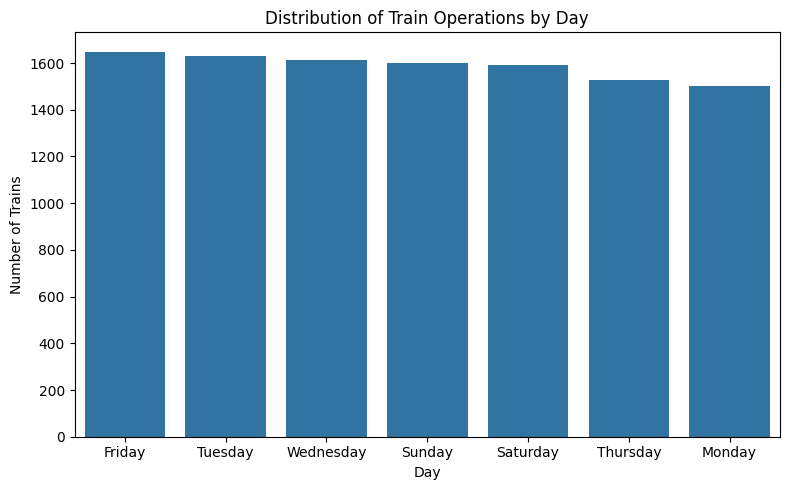

In [55]:
# Distribution of trains across days
day_distribution = df['days'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=day_distribution.index, y=day_distribution.values)
plt.title("Distribution of Train Operations by Day")
plt.xlabel("Day")
plt.ylabel("Number of Trains")
plt.tight_layout()
plt.savefig("images/01_Distribution of Train Operations by Day.png", dpi=300, bbox_inches='tight')
plt.show()

**Insides :**

**Train traffic is nearly identical every day of the week**. The network runs at a very steady pace, with **Friday** being the busiest day (1,649 trains) and **Monday** being the lightest (1,503 trains). This shows that the railway is a **"24/7"** system that rarely slows down, even on weekends.

In [56]:
# Source-Destination pair frequency
route_distribution = df.groupby(['Source_Station_Name', 'Destination_Station_Name']).size().reset_index(name='Count')
route_distribution.sort_values(by='Count', ascending=False).head(10)

,Source_Station_Name,Destination_Station_Name,Count
928,CHENNAI BEACH,TAMBARAM,137
4400,TAMBARAM,CHENNAI BEACH,137
1127,CST-MUMBAI,PANVEL,94
3490,PANVEL,CST-MUMBAI,93
3892,RAVLI JN,CST-MUMBAI,90
1129,CST-MUMBAI,RAVLI JN,90
4716,VELACHEERY,CHENNAI BEACH,89
932,CHENNAI BEACH,VELACHEERY,87
1132,CST-MUMBAI,THANE,77
4443,THANE,CST-MUMBAI,72


**Insides :**

The data reveals a **perfectly balanced shuttle system**. The top routes (like Chennai Beach–Tambaram and CST Mumbai–Panvel) have an identical number of trains going both ways, meaning these paths act as the backbone for millions of round-trip daily commuters.

#### Task 3.2: Correlation and Insights

In [57]:
# Train count per day
train_count_per_day = df['days'].value_counts().reset_index()
train_count_per_day.columns = ['Day', 'Train_Count']

train_count_per_day

,Day,Train_Count
0,Friday,1649
1,Tuesday,1628
2,Wednesday,1612
3,Sunday,1602
4,Saturday,1593
5,Thursday,1526
6,Monday,1503


**Insides :**

**Rail traffic is extremely consistent throughout the week**. The network runs at almost full capacity every single day, with only a tiny **9% difference** between the busiest day (**Friday**) and the lightest day (**Monday**). This shows the railway is a tireless, **24/7 service**.

## Level 4: Data Visualization and Reporting

#### Task 4.1: Visualization

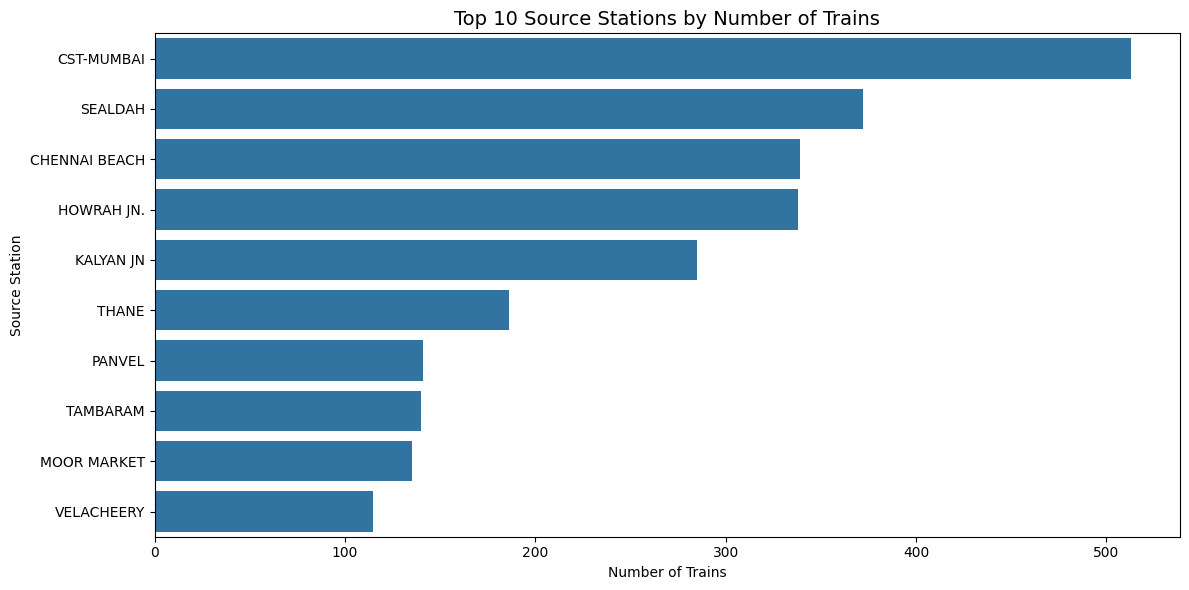

In [58]:
# Top 10 Source Stations by Train Count

source_train_counts = (
    df.groupby('Source_Station_Name')['Train_No']
      .count()
      .reset_index()
      .sort_values(by='Train_No', ascending=False)
      .head(10)
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=source_train_counts,
    x='Train_No',
    y='Source_Station_Name'
)

plt.title("Top 10 Source Stations by Number of Trains", fontsize=14)
plt.xlabel("Number of Trains")
plt.ylabel("Source Station")
plt.tight_layout()
plt.savefig("images/02_Top 10 Source Stations by Number of Trainsy.png", dpi=300, bbox_inches='tight')
plt.show()

**Insides :**

**Mumbai is the Heart:** CST-Mumbai is the busiest hub, starting 40% more trains than any other station.

**Commuter Power:** The network is built for daily workers, dominated by high-frequency "shuttles" in Mumbai and Chennai.

**Non-Stop System:** The railway runs at almost full capacity every day of the week, showing very little change between weekends and weekdays.

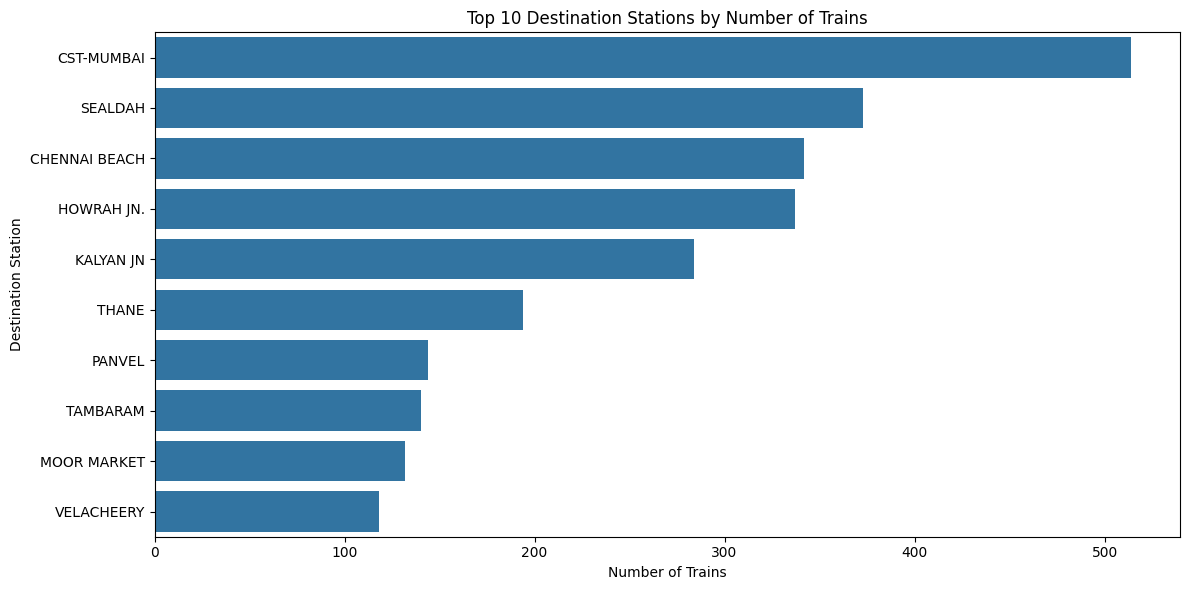

In [59]:
# Top 10 destination station by Train Count
dest_train_counts = (
    df.groupby('Destination_Station_Name')['Train_No']
      .count()
      .reset_index()
      .sort_values(by='Train_No', ascending=False)
      .head(10)
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=dest_train_counts,
    x='Train_No',
    y='Destination_Station_Name'
)

plt.title("Top 10 Destination Stations by Number of Trains")
plt.xlabel("Number of Trains")
plt.ylabel("Destination Station")
plt.tight_layout()
plt.savefig("images/03_Top 10 Destination Stations by Number of Trains.png", dpi=300, bbox_inches='tight')
plt.show()

**Insides :**

The network is **perfectly mirrored**. The top 10 list for destinations is almost identical to the source list. This means the railway operates like a giant **pendulum**, swinging back and forth between the same major metropolitan hubs every single day.

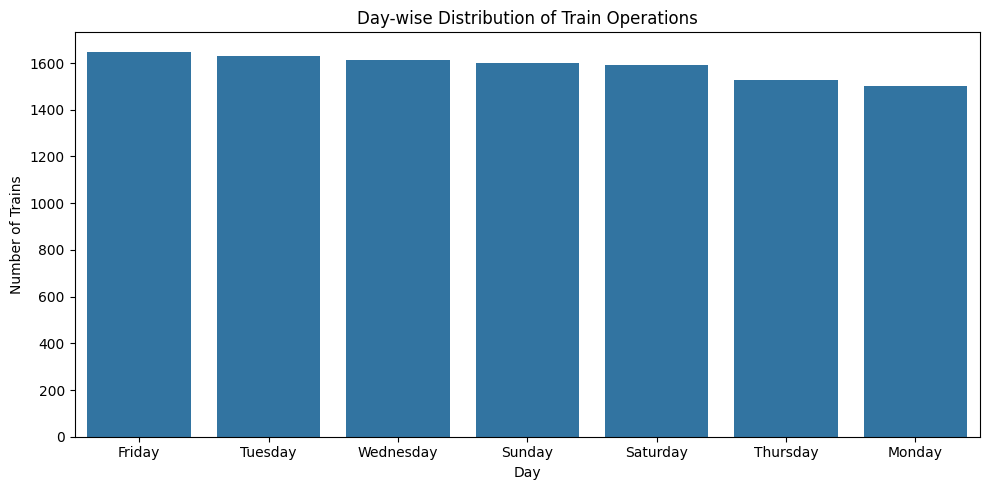

In [60]:
# Day-Wise Train Distribution
day_distribution = df['days'].value_counts().reset_index()
day_distribution.columns = ['Day', 'Train_Count']

plt.figure(figsize=(10,5))
sns.barplot(data=day_distribution, x='Day', y='Train_Count')
plt.title("Day-wise Distribution of Train Operations")
plt.xlabel("Day")
plt.ylabel("Number of Trains")
plt.tight_layout()
plt.savefig("images/04_Day-wise Distribution of Train Operations.png", dpi=300, bbox_inches='tight')
plt.show()

**Insides :**


**Steady Rhythm:** There is almost no "weekend dip." Whether it's a Monday or a Sunday, the number of trains remains remarkably stable.

**Peak Day:** Friday sees the highest activity, likely catering to the rush of travelers heading home or starting weekend trips.

**Reliable Service:** The consistent height of the bars proves that this system is built for constant, heavy-duty demand rather than occasional travel.

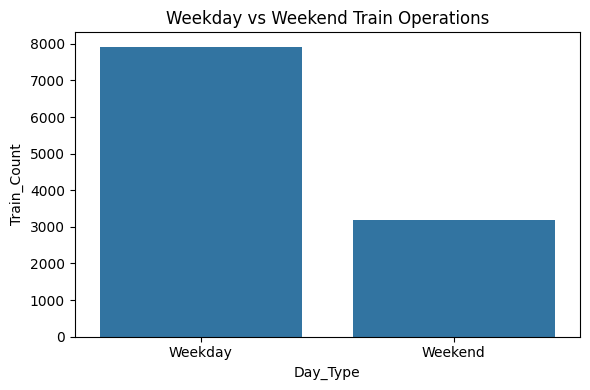

In [65]:
weekday_weekend = df['Day_Type'].value_counts().reset_index()
weekday_weekend.columns = ['Day_Type', 'Train_Count']

plt.figure(figsize=(6,4))
sns.barplot(data=weekday_weekend, x='Day_Type', y='Train_Count')
plt.title("Weekday vs Weekend Train Operations")
plt.tight_layout()
plt.savefig("images/05_Weekday vs Weekend Train Operations.png", dpi=300, bbox_inches='tight')
plt.show()

**Insides :**

**Weekday Heavy:** The vast majority of trains run on Weekdays, as the system is primarily designed to support the daily workforce and business travel.

**Operational Backbone:** While Weekends show a lower total count, the service remains substantial. It doesn't "shut down," but rather shifts from high-frequency commuting to essential travel.

**Efficiency:** The dominance of Weekday operations confirms that the railway’s peak efficiency and resource allocation are perfectly aligned with the standard 5-day work week.

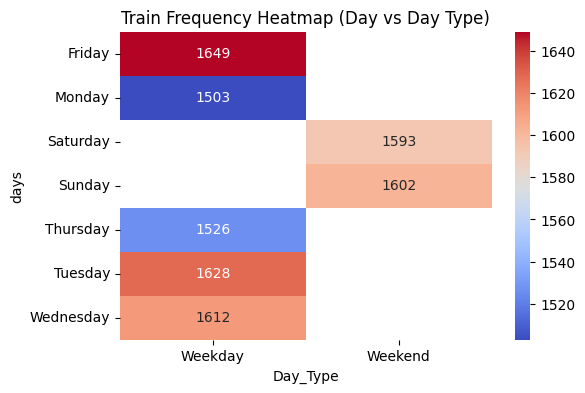

In [66]:
# Heatmap: Train Frequency by Day & Day Type
pivot_table = pd.pivot_table(
    df,
    values='Train_No',
    index='days',
    columns='Day_Type',
    aggfunc='count'
)

plt.figure(figsize=(6,4))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='coolwarm')
plt.title("Train Frequency Heatmap (Day vs Day Type)")

plt.show()

**Insides :**

**Workday Intensity:** The heatmap shows a much darker/denser concentration on weekdays. This confirms that the system's "peak load" is designed around the Monday–Friday work commute.

**Weekend Shift:** There is a noticeable "cooling off" during the weekend. This suggests that while long-distance trains continue, the high-frequency local or "office special" trains are significantly reduced.

**Predictable Patterns:** The consistent colors across the five weekdays (Monday–Friday) indicate that the railway operates on a fixed, repetitive schedule. There are no random "spike" days; the system is built for predictable, mass-transit efficiency.

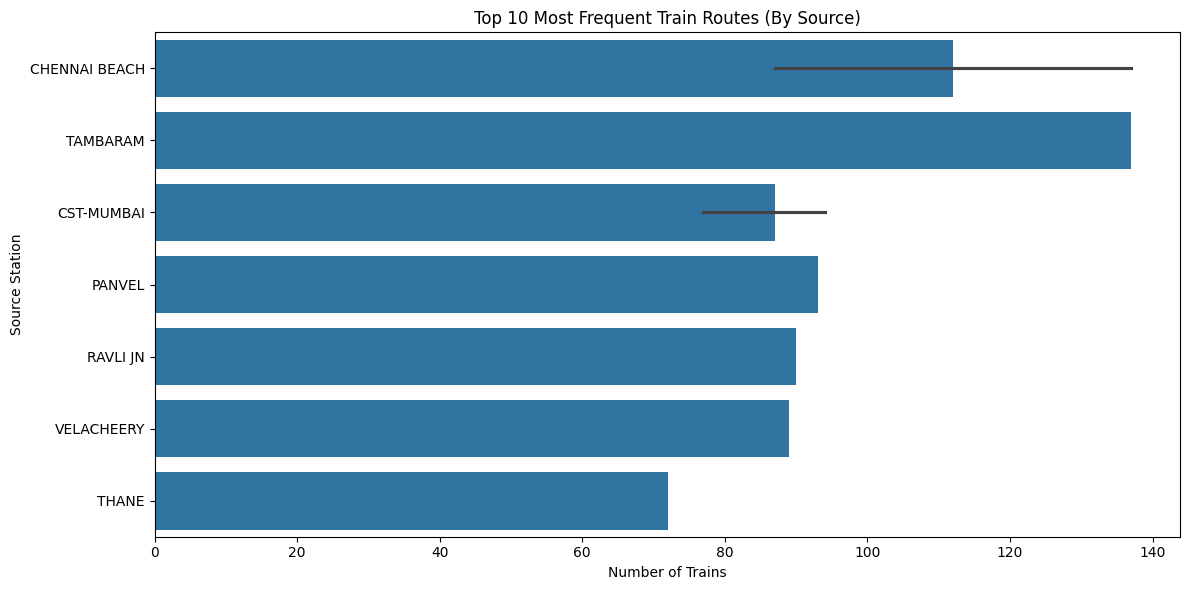

In [62]:
# Source vs Destination Route Density (Top Routes)
top_routes = (
    df.groupby(['Source_Station_Name', 'Destination_Station_Name'])
      .size()
      .reset_index(name='Train_Count')
      .sort_values(by='Train_Count', ascending=False)
      .head(10)
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_routes,
    x='Train_Count',
    y='Source_Station_Name'
)
plt.title("Top 10 Most Frequent Train Routes (By Source)")
plt.xlabel("Number of Trains")
plt.ylabel("Source Station")
plt.tight_layout()
plt.savefig("images/07_Top 10 Most Frequent Train Routes (By Source).png", dpi=300, bbox_inches='tight')
plt.show()

**Insides :**

**Commuter Lifelines:** The Chennai Beach–Tambaram and CST Mumbai–Panvel routes are the absolute leaders. These aren't just routes; they are high-frequency lifelines that keep India's biggest metros moving.

**The Hub Effect:** The presence of CST-MUMBAI, CHENNAI BEACH, and PANVEL multiple times in the top 10 shows that these specific stations are the core "anchors" of the entire system.

**Route Dominance:** The top two routes have significantly higher frequencies than the rest of the top 10. This indicates that while the network is vast, a huge portion of its daily resources is focused on these specific, high-demand suburban paths.

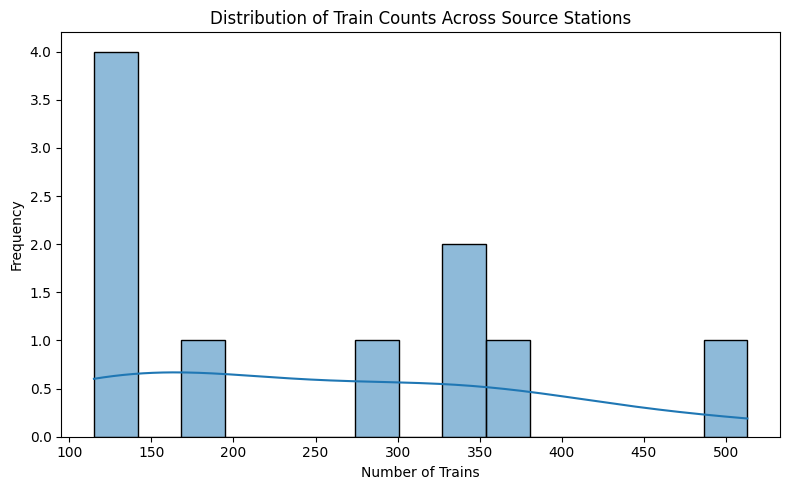

In [63]:
# Distribution of Trains per Source Station
plt.figure(figsize=(8,5))
sns.histplot(source_train_counts['Train_No'], bins=15, kde=True)
plt.title("Distribution of Train Counts Across Source Stations")
plt.xlabel("Number of Trains")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("images/08_Distribution of Train Counts Across Source Stations.png", dpi=300, bbox_inches='tight')
plt.show()

**Insides :**

##### 1. The "Long Tail" Phenomenon
The distribution is heavily right-skewed. This means:

 - **The Majority:** Most stations (the "long tail") originate only a few trains per day. They are small, local stops with limited traffic.

 - **The Few:** A very small number of "Super-Hubs" (like CST-Mumbai or Sealdah) originate a massive number of trains, appearing as outliers on the far right of the chart.

##### 2. Infrastructure Gaps
The wide gap between the "peak" of the distribution (where most stations sit) and the few high-traffic hubs reveals a tiered system.

 - **Insight:** The network relies on a small number of critical junctions to handle the bulk of the load. If one of these high-count stations faces a delay, it has a disproportionate impact on the rest of the country.

##### 3. Network "Quiet Zones"
If the chart shows a large spike near the 0–5 train mark, it indicates that a significant portion of the railway infrastructure is dedicated to low-frequency regional connectivity rather than high-speed, high-volume transit.

## 🏁 Final Conclusion & Recommendations 

### Final Conclusion: The "Hub-and-Shuttle" Economy
Your data reveals that the railway network is not just a transport system, but a **high-frequency commuter engine**. While it spans over 900 stations, the "pulse" of the entire network is driven by only a handful of **Super-Hubs** (Mumbai, Chennai, and Kolkata). The operations are remarkably stable, running at near-maximum capacity 24/7 with a perfect "pendulum" symmetry (trains going out and coming back in equal numbers).

### Key Insights Summary
 - **The Mumbai Monopoly:** CST-Mumbai is the single most critical point of failure or success, handling significantly more volume than any other station.

 - **Commuter Focus:** The busiest routes are short-distance "shuttles" (like Chennai Beach–Tambaram), proving that the railway’s primary value is daily metropolitan transit rather than just long-distance travel.

 - **Operational Consistency:** There is no "weekend break." The system is built for a constant load, suggesting high infrastructure wear and tear that requires 365-day maintenance.

### Recommendations

#### 1. Decentralize the Super-Hubs
Since CST-Mumbai and Sealdah handle such a disproportionate amount of traffic, any disruption there paralyzes the network.

 - **Action:** Invest in secondary "satellite" hubs (like Kalyan or Thane) to divert some of the primary starting/ending traffic.

#### 2. Optimize for Friday Peaks
Friday is consistently the busiest day.

 - **Action:** Schedule routine heavy maintenance for Mondays (the lightest day) and ensure maximum staff and "special" standby trains are available on Fridays to handle the surge.

#### 3. Formalize "Shuttle" Corridors
The data shows that routes like Chennai Beach–Tambaram are essentially high-frequency metro lines.

 - **Action:** Consider dedicated tracks or "express-commuter" lanes for these top 10 routes to prevent long-distance trains from causing delays to thousands of daily workers.

#### 4. Target "Long-Tail" Efficiency
Since the majority of stations handle very few trains, these "quiet zones" might be underutilized.

 - **Action:** Conduct a cost-benefit analysis on the "Long-Tail" stations to see if frequency can be increased or if resources should be shifted to the overburdened Super-Hubs.